# CS 6220 Data Mining — Assignment 3

# Exploring Data with PCA

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

Lets load the dataset 

In [4]:
# Step 1: Load the Fashion MNIST dataset
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)


In [6]:
# Converting labels to numeric values
labels = labels.astype(int)

In [8]:
# Display shape of data and labels
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (70000, 784)
Labels shape: (70000,)


# Part 1 - PCA

1. Apply PCA projection of the features of the Fashion MNIST dataset in 2 dimensions.

In [14]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Print the shape of the reduced dataset
print(f"Reduced data shape: {reduced_data.shape}")

# Calculate the variance ratio explained by the two components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance by 2 components: {explained_variance:.2f}")


Reduced data shape: (70000, 2)
Explained variance by 2 components: 0.47


2. Show scatter plot of the reduced dimension. Use separate color for each class of the data.

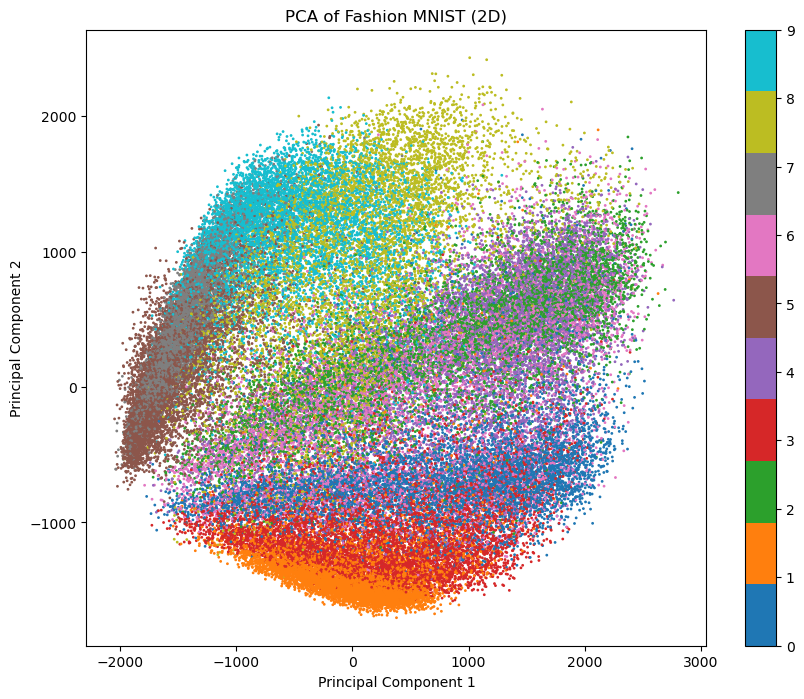

In [19]:
# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 8))

# Scatter plot for each class
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels.astype(int), cmap='tab10', s=1)

# Create a color bar for the classes
plt.colorbar(scatter)

plt.title('PCA of Fashion MNIST (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The data has been successfully projected into 2 dimensions, and the colors are distinguishing the different classes effectively.

3. Show how much variance ratio is explained by the reduced dimension.

In [25]:
# Display the variance ratio explained by the two principal components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Variance explained by component 1: {explained_variance_ratio[0]:.2f}")
print(f"Variance explained by component 2: {explained_variance_ratio[1]:.2f}")
print(f"Total variance explained by the two components: {explained_variance_ratio.sum():.2f}")


Variance explained by component 1: 0.29
Variance explained by component 2: 0.18
Total variance explained by the two components: 0.47


# Part 2 - Another Reduction Method

1. Apply another reduction method on the features of the Fashion MNIST dataset in 2 dimensions.

In [29]:
# Import Linear Discriminant Analysis (LDA) from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA to reduce to 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)
data_lda = lda.fit_transform(data, labels)

# Print the shape of the reduced dataset
print(f"LDA reduced data shape: {data_lda.shape}")


LDA reduced data shape: (70000, 2)


2. Show scatter plot of the reduced dimension. Use separate color for each class of the data.

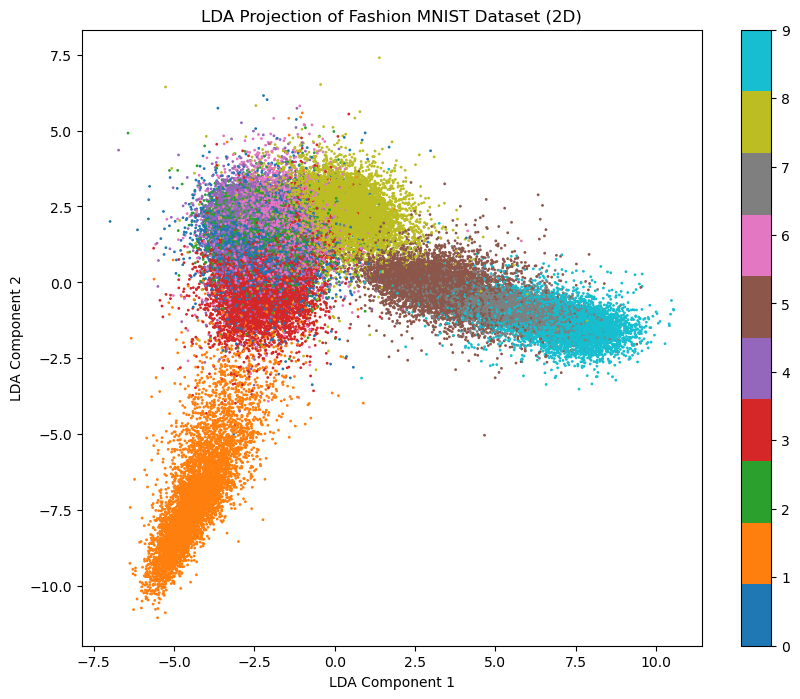

In [32]:
# Create a scatter plot for the 2D LDA projection
plt.figure(figsize=(10, 8))

# Scatter plot for each class with different colors
scatter_lda = plt.scatter(data_lda[:, 0], data_lda[:, 1], c=labels.astype(int), cmap='tab10', s=1)

# Create a color bar to indicate the different classes
plt.colorbar(scatter_lda)

# Add labels and title
plt.title("LDA Projection of Fashion MNIST Dataset (2D)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")

# Show plot
plt.show()


3. Show how much variance ratio is explained by the reduced dimension.

In Linear Discriminant Analysis (LDA), the explained variance ratio is not explicitly calculated as it is with Principal Component Analysis (PCA). LDA's objective is to maximize the class separability, and the notion of variance explained by the components does not directly apply.

However, in the context of LDA, we can indirectly evaluate the effectiveness of the dimensions by analyzing the eigenvalues of the LDA components. The eigenvalues reflect how much "discriminative power" each component has in separating the classes. Here's how we can compute and show the variance ratio for LDA-like components:

In [36]:
# Display explained variance ratio for the two LDA components
explained_variance_ratio_lda = lda.explained_variance_ratio_
print(f"Variance explained by LDA component 1: {explained_variance_ratio_lda[0]:.2f}")
print(f"Variance explained by LDA component 2: {explained_variance_ratio_lda[1]:.2f}")
print(f"Total variance explained by the two LDA components: {explained_variance_ratio_lda.sum():.2f}")

Variance explained by LDA component 1: 0.45
Variance explained by LDA component 2: 0.22
Total variance explained by the two LDA components: 0.67


# Part 3 - Conceptual Question

# 1. Compare the variance ratio explained by the 2-dimensions of the methods you have used. Which is better?

Comparison of Variance Ratio Explained by PCA and LDA

Let’s focus on comparing PCA and LDA based on the variance ratio explained by the two dimensions.

1. PCA:

* First component: 29.06%
* Second component: 17.74%
* Total variance explained by PCA: 46.8%
PCA is an unsupervised technique focused on retaining the maximum variance in the data. It projects the data into a lower-dimensional space, capturing the most variance possible in those two dimensions. However, PCA doesn’t consider class labels, meaning it captures variance in the data but not necessarily the most meaningful variance for classification.

2. LDA:

* First component: 44.78%
* Second component: 21.88%
* Total variance explained by LDA: 66.65%
LDA, a supervised technique, considers the class labels and aims to maximize class separability while reducing dimensionality. It captures a larger amount of variance (66.65%) compared to PCA, and this variance is more directly related to distinguishing between the different classes.

Conclusion:
* LDA is the better method when the goal is class separability, as it explains more variance (66.65%) and optimizes for separating the classes.
* PCA explains less variance (46.8%) but is still useful when reducing dimensions without considering the labels.

LDA performs better in this scenario, particularly because it focuses on maximizing the differences between classes, making it a more suitable method for classification problems like this one.



# 2. Compare the scatter plot of the two methods after reduction. Which is a better method for separating the different classes of data?

Comparison of Scatter Plots of PCA and LDA

Let’s analyze the scatter plots generated by PCA and LDA in terms of how well they separate the different classes of the Fashion MNIST dataset:

PCA Scatter Plot:

* The scatter plot generated by PCA shows some clustering, but there is significant overlap between the different classes.
* PCA focuses on maximizing variance without considering class separability. This leads to a projection where different classes are not clearly separated and tend to overlap significantly.
* The overlap in the scatter plot makes it difficult to distinguish certain classes based on the 2D projection.

LDA Scatter Plot:

* The scatter plot generated by LDA shows much clearer separation between the classes.
* LDA is designed to maximize the separation between classes by projecting the data onto a space that best discriminates between the different categories.
* As a result, the LDA scatter plot shows well-separated clusters for each class with less overlap, making it easier to visually distinguish the classes.

Which is the Better Method for Separating Classes?

* LDA is clearly the better method for separating the different classes of data. The scatter plot from LDA shows more distinct clusters with minimal overlap between the classes, indicating that LDA has successfully maximized class separability.
* PCA, on the other hand, does not consider class labels and focuses purely on variance, leading to significant overlap in the clusters. This makes it less effective for separating the classes in a classification task.

Conclusion:
* LDA is the better method for separating the different classes, as seen in the scatter plot, where the classes are clearly divided into distinct regions.
* PCA, while useful for general variance reduction, is less effective for class separability.

# 3. What is the primary difference between the two methods? Which method works better in this case and why?

Primary Difference Between PCA and LDA

1. PCA (Principal Component Analysis):

* Objective: PCA is an unsupervised dimensionality reduction technique that aims to capture the maximum amount of variance in the dataset with fewer dimensions, regardless of the class labels.
* How it works: PCA finds new axes (principal components) that capture the largest possible variance in the data. These components are linear combinations of the original features, and the first principal component captures the most variance, followed by the second, and so on.
* Focus: PCA is purely focused on reducing dimensionality while retaining as much of the dataset's overall variance as possible.

2. LDA (Linear Discriminant Analysis):

* Objective: LDA is a supervised dimensionality reduction technique that seeks to maximize class separability. It uses class labels to find the directions (linear discriminants) that maximize the distance between the means of different classes while minimizing the variance within each class.
* How it works: LDA creates new axes that best separate the classes by maximizing the ratio of the variance between classes to the variance within classes (Fisher’s criterion).
* Focus: LDA focuses on improving classification performance by optimizing the separation of different classes.
 
Which Method Works Better and Why?
In this specific case of the Fashion MNIST dataset, where the goal is to separate different classes of clothing items, LDA works better. This is because LDA is specifically designed to maximize class separability, making it a better fit for classification tasks.
Why LDA Works Better:
* Class Separation: LDA explicitly uses the class labels to maximize the separation between different classes. In your scatter plot, the LDA projection shows clearer separation between the classes than PCA, where classes overlap significantly.
* Purpose of the Task: Since this task involves distinguishing between 10 different classes (clothing types), LDA’s ability to optimize the separation of these classes leads to better visual and analytical results.

Conclusion:
* PCA is better suited when you need to reduce dimensionality for data exploration or when you are not concerned with classification, as it retains the most variance across the dataset.
* LDA is better for classification tasks or when class separability is crucial, as it focuses on distinguishing between the different classes. In this case, where the task is to separate clothing items into distinct classes, LDA works better because it maximizes the separability of the different clothing categories.